# Analysing IPL Dataset

### Loading important libraries

In [103]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14,8)

### Reading the dataset

In [9]:
data = pd.read_csv('.\matches.csv')

### Basic Information About the Dataset

In [10]:
data.shape

(636, 18)

#### Result:
Dataset is having 636 rows and 18 columns

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


#### Result:
This let us know different types of attributes present in our dataset.

In [12]:
data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


#### Result:
A small statistical summary of our dataset.

In [14]:
data['id'].max()

636

#### Result:
To every observation a different id is assigned.
Hence, we can calculate the total no. of matches by above method.
636 IPL matches were played according to our dataset.

In [17]:
data['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

#### Result:
This let us know in which years IPL matches were played. 

In [20]:
len(data['season'].unique())

10

#### Result:
We can easily calculate the total no. of seasons by just finding the length of the array of unique seasons. There were total 10 seasons played.

In [21]:
data['win_by_runs'].max()

146

#### Result:
This is the maximum run by which a team won.

In [25]:
max_run_id = data['win_by_runs'].idxmax()
data.iloc[max_run_id]['winner']

'Mumbai Indians'

#### Result:
This let us know the name of the team which won by maximun runs of 146.

In [28]:
data['win_by_wickets'].max()

10

#### Result:
Maximum no. of wickets by which a team won was 10.

In [32]:
max_wick_id = data['win_by_wickets'].idxmax()
data.iloc[max_wick_id]['winner']

'Kolkata Knight Riders'

#### Result:
Kolkata  Knight Riders was the team which won by maximun wickets.

In [43]:
min_run_id = data[data['win_by_runs'].ge(1)].win_by_runs.idxmin()
data.iloc[min_run_id]['winner']

'Mumbai Indians'

#### Result:
Team won by minimum number(closest margin) of runs was Mumbai Indians.

#### Note:
To know the team that was won by the closest margin, we have to do the opposite of what we’ve done in the above steps. But there’s a caveat in that. In Cricket, if the team that’s batting second wins the match (by chasing), it’ll be said “Team second won by x number of wickets” and if the team that’s bowling second (batted first) wins the match (by defending their score), it’ll be said “Team first won by x number of runs”. Hence, the minimum win by runs will always be 0 and the minimum win by wickets will also always be 0 in a tournament since sometimes chasing team or sometimes the team that batted first could win. Hence, Instead of just getting the minimum score (which always would be 0), we have subsetted the data that has win_by_runs greater than or equal to 1 (there by eliminating the zero-issue).

In [65]:
min_wick_id = data[data['win_by_wickets'].ge(1)].win_by_wickets.idxmin()
data.iloc[min_wick_id]['winner']

'Kolkata Knight Riders'

#### Result:
Kolkata Knight Riders was the team which won by minimum number of wickets. Same approach as above will be applied.

In [71]:
data['season'].value_counts()

2013    76
2012    74
2011    73
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

#### Result:
2013 is the session which had most no. of matches i.e. 76 and 2009 is the session which had minimum number of matches i.e. 57.

C:\Users\Praneet\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


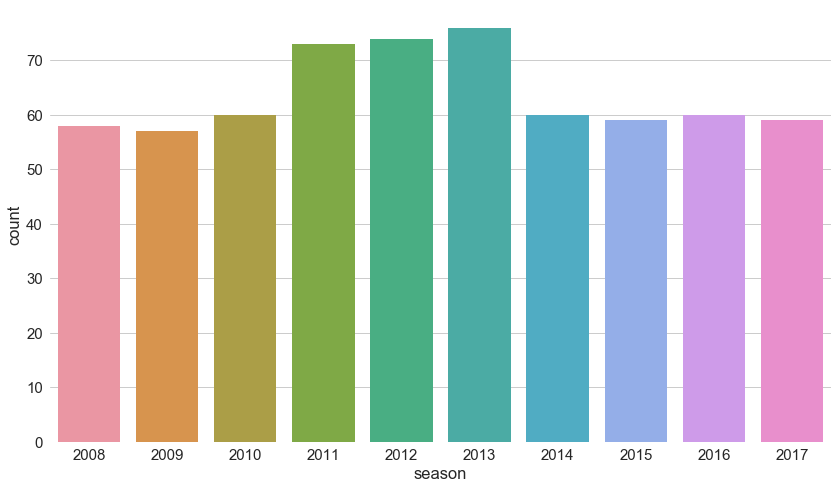

In [86]:
sns.countplot(x='season', data=data)
sns.despine(bottom=True, left=True)
sns.set(font_scale=1.5)

#### Result:
Shows the maximum no. of matches played in which session with the help of bar graph. 

In [90]:
data.winner.value_counts()

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

#### Result:
Mumbai Indians won maximum no. of matches i.e. 92 and Rising Pune Supergiants won mini0mum no. of matches i.e. 5.

In [92]:
data.winner.value_counts().index

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Sunrisers Hyderabad', 'Deccan Chargers',
       'Gujarat Lions', 'Pune Warriors', 'Rising Pune Supergiant',
       'Kochi Tuskers Kerala', 'Rising Pune Supergiants'],
      dtype='object')

C:\Users\Praneet\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


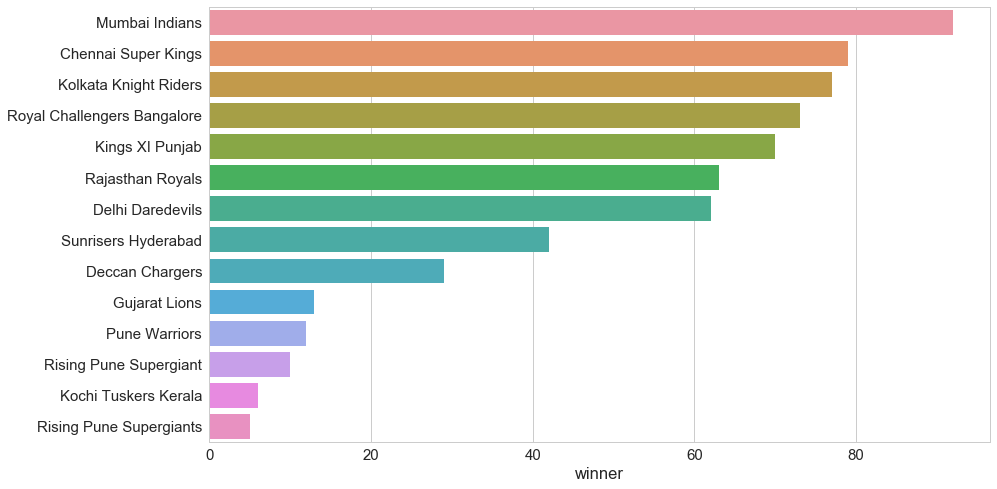

In [95]:
winners = data.winner.value_counts().index
sns.barplot(y=winners, x=data.winner.value_counts(), orient='h')

#### Result:
This barplot shows us the most successful IPL teams.

In [98]:
data['player_of_match'].value_counts().head(10)

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
SK Raina          14
G Gambhir         13
MS Dhoni          13
AM Rahane         12
MEK Hussey        12
Name: player_of_match, dtype: int64

#### Result:
Top 10 players of the match winner.

C:\Users\Praneet\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


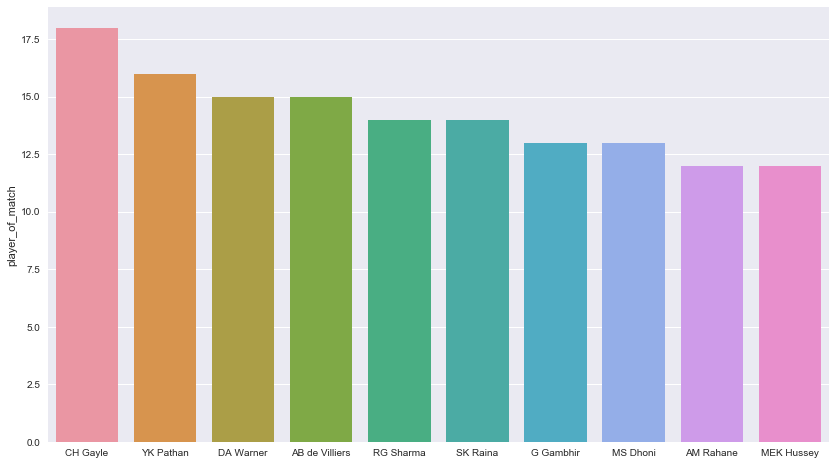

In [111]:
players = data['player_of_match'].value_counts().head(10)
sns.barplot(x=players.index, y=players, orient='v')
sns.set(font_scale=1.0)

### Result:
We saw Chris Gale was on the top.

In [118]:
ss = data['toss_winner'] == data['winner']
ss.groupby(ss).size()

False    311
True     325
dtype: int64

C:\Users\Praneet\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


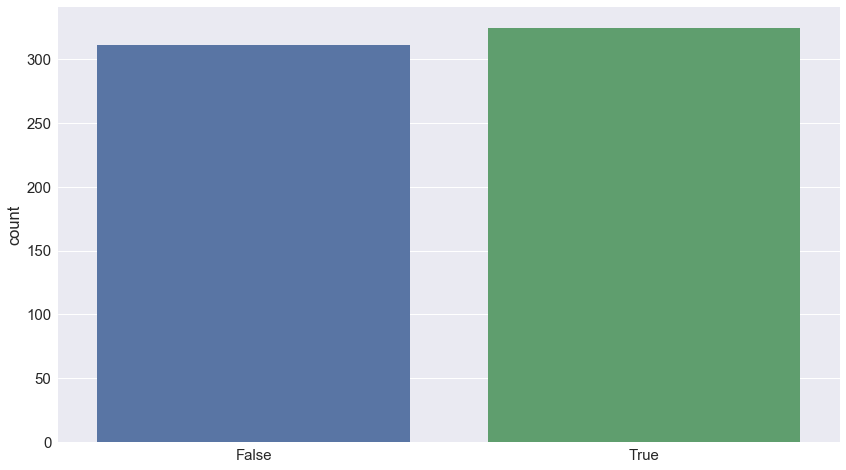

In [122]:
sns.countplot(ss)
sns.set(font_scale=1.5)

#### Result:
Looks like, Toss winning actually helps in Match winning — or to be statistically right, we could say there’s a correlation between Toss Winning and Match Winning and so we can assume that it helps.